In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("OpenCV version", cv2.__version__)
print("NumPy version", np.__version__)


OpenCV version 4.5.5
NumPy version 1.22.3


In [4]:
np.random.seed(153)
x = np.random.randint(0, 5, 10)
x

array([4, 0, 0, 1, 2, 1, 3, 0, 2, 4])

In [5]:
dist = []
for i in range(5):
    dist.append(x[x==i].size)
dist


[3, 2, 2, 1, 2]

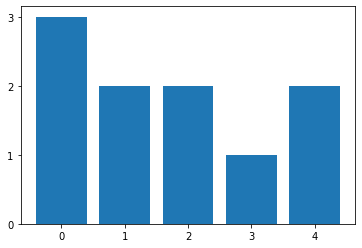

In [6]:
plt.bar(range(len(dist)),dist)
plt.yticks(range(4))
plt.show()

In [7]:
np.random.seed(153)
x = np.random.randint(0, 16, (100, 100))
x, x.shape

(array([[15, 12,  0, ..., 12,  5,  8],
        [15,  3,  2, ...,  9, 12, 14],
        [12,  6, 15, ...,  9, 11,  2],
        ...,
        [15,  4,  7, ...,  7, 15, 11],
        [ 7,  8, 11, ...,  4,  0, 14],
        [ 5,  6,  0, ...,  4, 10,  6]]),
 (100, 100))

In [8]:
x.min() , x.max()

(0, 15)

In [9]:
dist = np.zeros(x.max()+1, dtype=np.uint16)
for r in range(100):
    for c in range(100):
        dist[x[r,c]] += 1

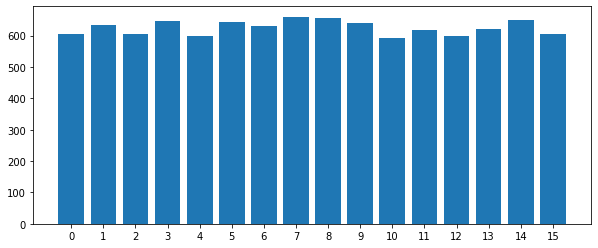

In [10]:
plt.figure(figsize=(10,4))
plt.bar(range(len(dist)), dist)
plt.xticks(range(16))
plt.show()

In [11]:
a = np.array([1, 0, 1, 2, 0])
idx0 = a == 0
idx0

array([False,  True, False, False,  True])

In [12]:
a[idx0]

array([0, 0])

In [13]:
a[a==1]

array([1, 1])

In [14]:
a[a==2]

array([2])

In [15]:
for n in range(3):
    print(n, a[a==n].size)

0 2
1 2
2 1


In [16]:
dist =[]
for n in range(3):
    dist.append(a[a==n].size)
dist

[2, 2, 1]

In [17]:
[a[a==n].size for n in range(3)]

[2, 2, 1]

In [18]:
np.count_nonzero(a==0)

2

In [19]:
np.sum(a==0)

2

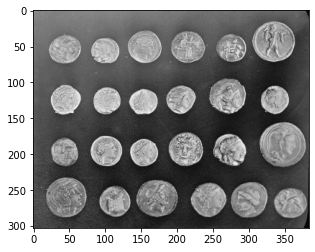

In [20]:
from skimage import data
coins = data.coins()
plt.imshow(coins, cmap='gray')
plt.show()

In [21]:
coins.shape, coins.min(), coins.max()

((303, 384), 1, 252)

In [22]:
hist = [coins[coins==n].size for n in range(256)]

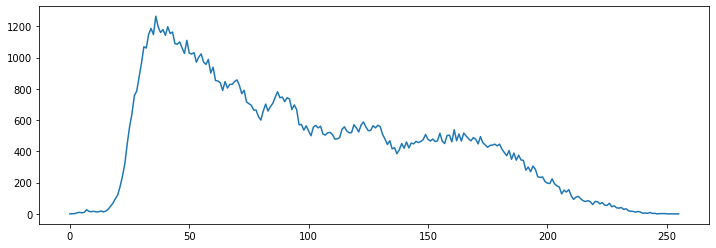

In [23]:
plt.figure(figsize=(12,4))
plt.plot(range(256), hist)
plt.show()

In [42]:
from skimage.exposure import histogram

In [25]:
hist, hist_centers = histogram(coins)

In [26]:
hist_centers, hist

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

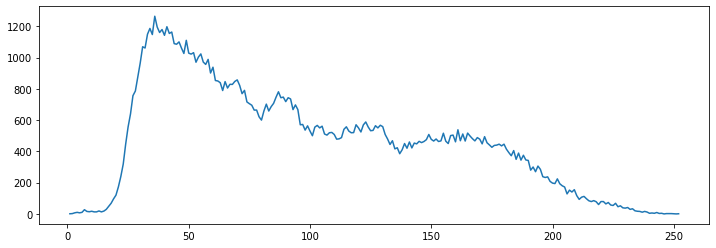

In [27]:
plt.figure(figsize=(12,4))
plt.plot(hist_centers, hist)
plt.show()

In [3]:
def image_info(img):
    print(f"shape: {img.shape}")
    print(f"dtype: {img.dtype}")
    if img.ndim == 3: # color image
        print(f"min & max of R: {img[:,:,0].min()}, {img[:,:,0].max()}")
        print(f"min & max of G: {img[:,:,1].min()}, {img[:,:,1].max()}")
        print(f"min & max of B: {img[:,:,2].min()}, {img[:,:,2].max()}")
    elif img.ndim == 2: # gray-scale image
        print(f"min & max: {img.min()}, {img.max()}")
def RGB2gray(img):
    assert img.ndim == 3
    img_L = (0.2989 * img[:,:,0] + 0.5870 * img[:,:,1] + 0.1140 * img[:,:,2])
    img_L = img_L.round(0).clip(0,255).astype(np.uint8)
    return img_L
    
def show_two_images(img1, img2):
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    plt.imshow(img1, vmin=0, vmax=255)
    plt.xticks((0, img1.shape[1]-1))
    plt.yticks((0, img1.shape[0]-1))
    plt.subplot(122)
    plt.imshow(img2, vmin=0, vmax=255, cmap='gray')
    plt.xticks((0, img2.shape[1]-1))
    plt.yticks((0, img2.shape[0]-1))
    plt.show()


In [20]:

flower = plt.imread('flower512.png')

image_info(flower)

shape: (512, 512, 3)
dtype: float32
min & max of R: 0.0, 1.0
min & max of G: 0.0, 1.0
min & max of B: 0.0, 1.0


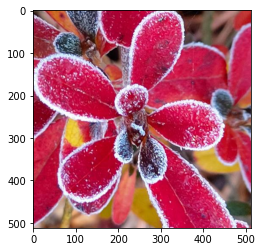

In [21]:
plt.imshow(flower)

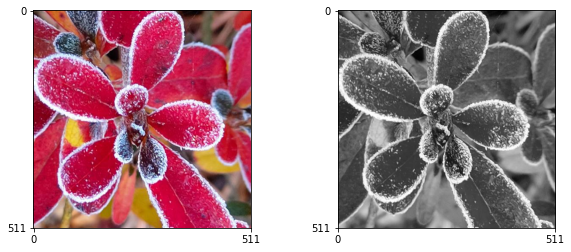

In [24]:
flower = (255*flower).round(0).clip(0,255).astype(np.uint8)
flower_L = RGB2gray(flower)
show_two_images(flower, flower_L)

In [25]:
hist_B = cv2.calcHist([flower], [0], None, [256], [0, 256])
hist_G = cv2.calcHist([flower], [1], None, [256], [0, 256])
hist_R = cv2.calcHist([flower], [2], None, [256], [0, 256])

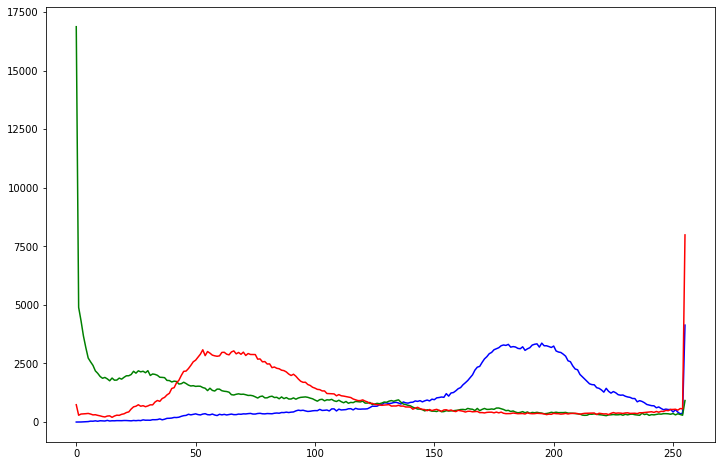

In [26]:
plt.figure(figsize=(12,8))

plt.plot(range(256), hist_B, "blue")
plt.plot(range(256), hist_G, "green")
plt.plot(range(256), hist_R, "red")



In [27]:
def log_transformation(r):
    C = 255 / np.log(256)
    s = (C * np.log(1. + r)).round(0).clip(0,255).astype(np.uint8)
    return s

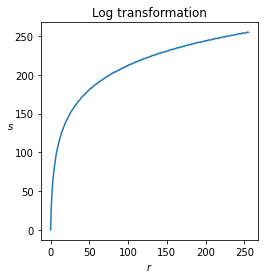

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
r = np.arange(256)
s = log_transformation(r)
ax.plot(r,s)
ax.set_xlabel("$r$")
ax.set_ylabel("$s$", rotation=0)
ax.set_title("Log transformation")
ax.set_aspect('equal')
plt.show()

In [31]:
r = np.arange(6)
s = log_transformation(r)
print(r)
print(s)

[0 1 2 3 4 5]
[ 0 32 51 64 74 82]


In [74]:
r = np.arange(201,211)
s = log_transformation(r)
print(r)
print(s)

[201 202 203 204 205 206 207 208 209 210]
[244 244 245 245 245 245 245 246 246 246]


In [32]:
coins_log = log_transformation(coins)

NameError: name 'coins' is not defined

In [78]:
image_info(coins)
image_info(coins_log)

shape: (303, 384)
dtype: uint8
min & max: 1, 252
shape: (303, 384)
dtype: uint8
min & max: 32, 254


In [33]:
show_two_images(coins, coins_log)

NameError: name 'coins' is not defined

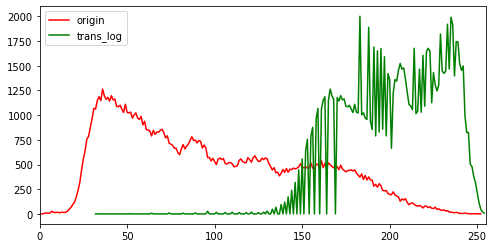

In [90]:
plt.figure(figsize=(8,4))
hist, hist_centers = histogram(coins)
hist_log, hist_centers_log = histogram(coins_log)
plt.plot(hist_centers, hist, 'r', label='origin')
plt.plot(hist_centers_log, hist_log, 'g', label='trans_log')
plt.xlim(0, 255)
plt.legend()
plt.show()

In [34]:
forest = plt.imread('forest.jpg')
image_info(forest)

shape: (427, 640, 3)
dtype: uint8
min & max of R: 0, 255
min & max of G: 0, 255
min & max of B: 0, 255


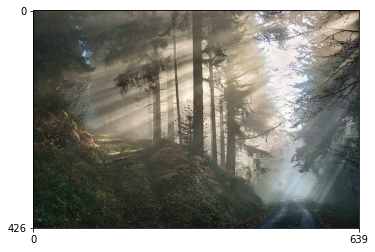

In [35]:
plt.imshow(forest, vmin=0, vmax=255)
plt.xticks((0, forest.shape[1]-1))
plt.yticks((0, forest.shape[0]-1))
plt.show()

In [36]:
forest_L = RGB2gray(forest)
image_info(forest_L)

shape: (427, 640)
dtype: uint8
min & max: 0, 255


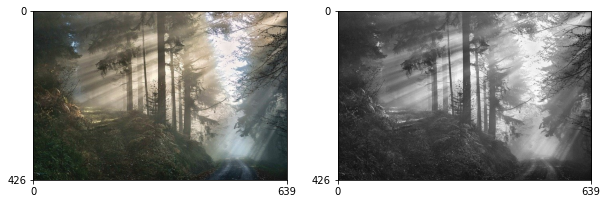

In [37]:
show_two_images(forest,forest_L)

In [39]:
forest_L_log = log_transformation(forest_L)

C:\Users\dldms\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dldms\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dldms\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dldms\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dldms\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) m

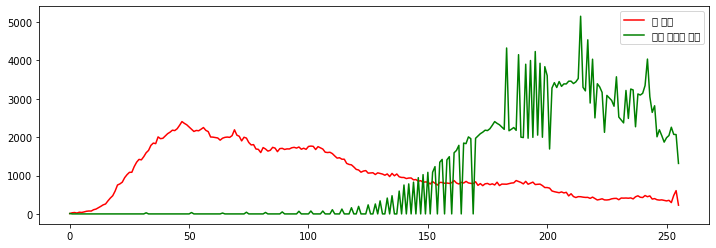

In [43]:
plt.figure(figsize=(12,4))
hist, hist_centers = histogram(forest_L)
hist_log, hist_centers_log = histogram(forest_L_log)
plt.plot(hist_centers, hist, 'r', label='원 영상')
plt.plot(hist_centers_log, hist_log, 'g', label='로그 변환된 영상')
plt.legend()
plt.show()

In [44]:
def gamma_transformation(img, gamma):
    out = 255. ** (1. - gamma) * img ** gamma
    return out.round(0).clip(0,255).astype(np.uint8)

def gamma_transformation_cv2LUT(img, gamma):
    out = 255. ** (1. - gamma) * np.arange(256) ** gamma
    lut = out.round(0).clip(0,255).astype(np.uint8)
    return cv2.LUT(img, lut)



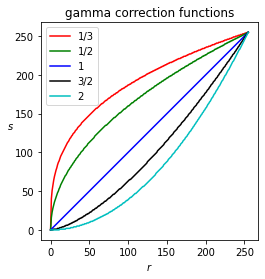

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
gammas = ('1/3', '1/2', '1', '3/2', '2')
colors = ('r', 'g', 'b', 'k', 'c')
r = np.arange(256)
for n, gamma in enumerate(gammas):
    s = gamma_transformation(r, eval(gamma))
    ax.plot(r, s, colors[n], label=gamma)
ax.set_xlabel("$r$")
ax.set_ylabel("$s$", rotation=0)
ax.set_title("gamma correction functions")
ax.set_aspect('equal')
plt.legend()
plt.show()

0 0.3333333333333333
1 0.5
2 1
3 1.5
4 2


In [196]:
a = np.array([10, 20])
gamma_transformation(a, 1/3)

array([ 87, 109], dtype=uint8)

In [197]:
a = np.array([200, 210])
gamma_transformation(a, 1/3)

array([235, 239], dtype=uint8)

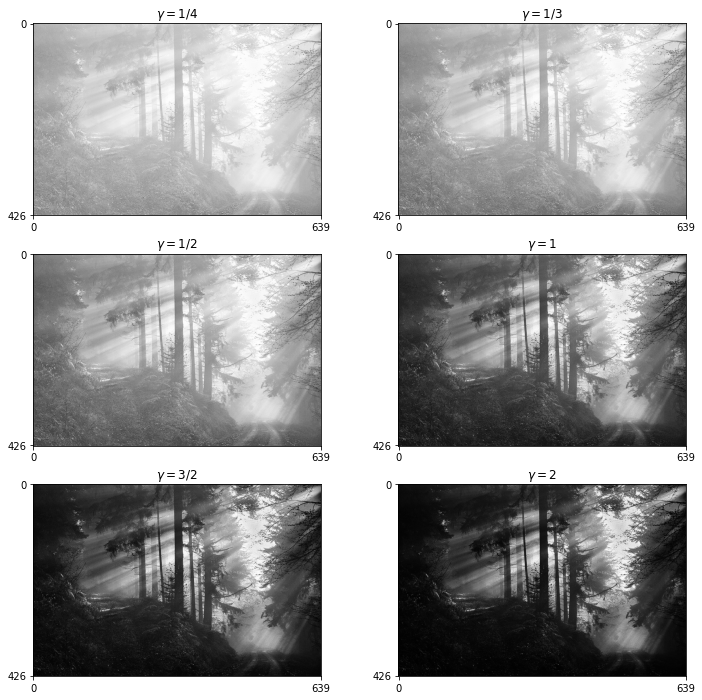

In [46]:
gammas = ('1/4', '1/3', '1/2', '1', '3/2', '2')
plt.figure(figsize=(12, 12))
for n, gamma in enumerate(gammas):
    plt.subplot(321+n)
    out = gamma_transformation_cv2LUT(forest_L, eval(gamma))
    plt.imshow(out, cmap='gray', vmin=0, vmax=255)
    plt.title(f'$\gamma = {gamma}$')
    plt.xticks((0, out.shape[1]-1))
    plt.yticks((0, out.shape[0]-1))

plt.show()

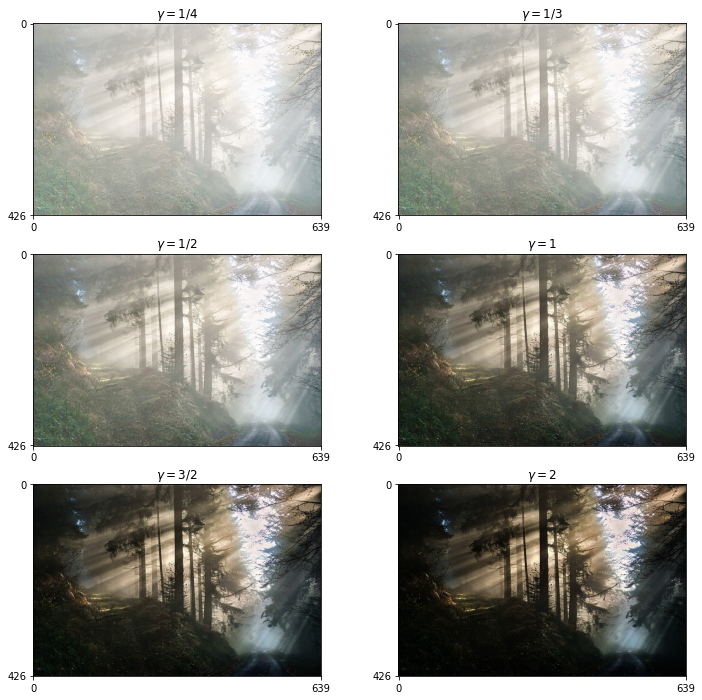

In [47]:
gammas = ('1/4', '1/3', '1/2', '1', '3/2', '2')
plt.figure(figsize=(12, 12))
for n, gamma in enumerate(gammas):
    plt.subplot(321+n)
    img = gamma_transformation_cv2LUT(forest, eval(gamma))
    plt.imshow(img, vmin=0, vmax=255)
    plt.title(f'$\gamma = {gamma}$')
    plt.xticks((0, img.shape[1]-1))
    plt.yticks((0, img.shape[0]-1))
plt.show()


In [55]:
grass = plt.imread('grass.jpg')
image_info(grass)

shape: (427, 640, 3)
dtype: uint8
min & max of R: 0, 234
min & max of G: 0, 222
min & max of B: 0, 246


In [65]:
def show_single_image(image):
    plt.figure(figsize=(12,12))
    plt.imshow(image, vmin=0, vmax=255)
    plt.xticks((0, image.shape[1]-1))
    plt.yticks((0, image.shape[0]-1))


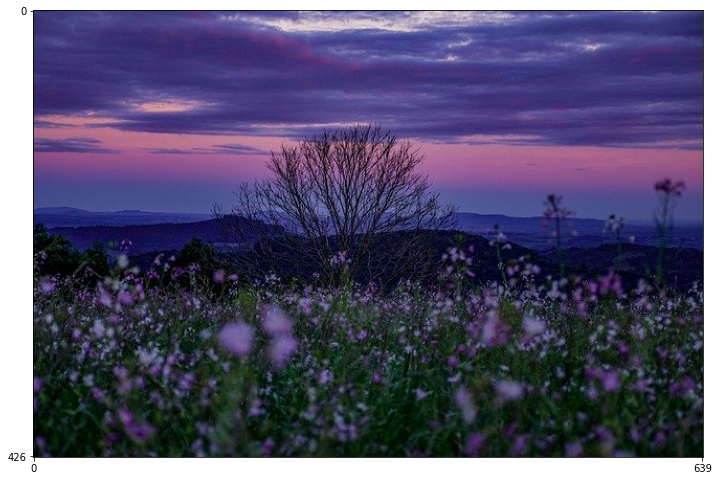

In [66]:
show_single_image(grass)

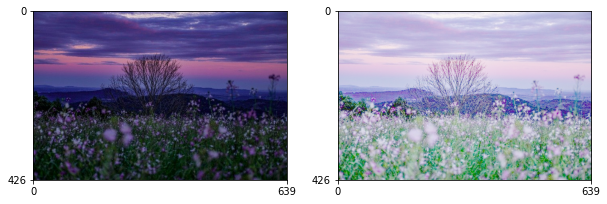

In [59]:
grass_log = log_transformation(grass)
show_two_images(grass, grass_log)

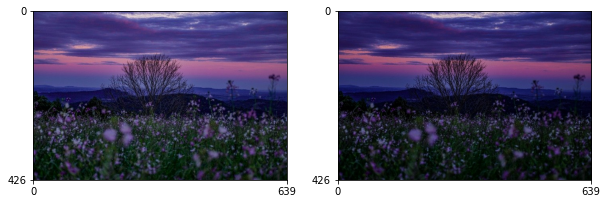

In [60]:
grass_gamma = gamma_transformation(grass, 1.3)
show_two_images(grass, grass_gamma)

In [61]:
def constrast_strectching(img):
    slope = 255/(img.max()-img.min())
    return ((img - img.min())* slope).round(0).clip(0, 255).astype(np.uint8)

In [62]:
grass_L = RGB2gray(grass)
grass_L_stretched = constrast_strectching(grass_L)

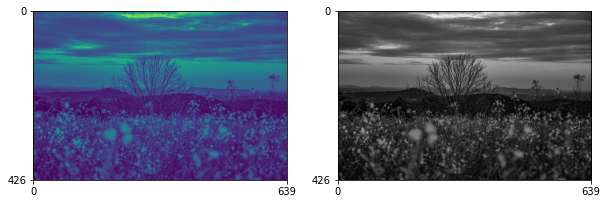

In [63]:
show_two_images(grass_L,grass_L_stretched)

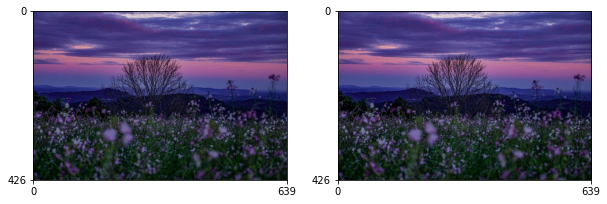

In [64]:
grass_stretched = constrast_strectching(grass)
show_two_images(grass, grass_stretched)

In [67]:
grass_stretched_gamma = gamma_transformation(grass_stretched,1.3)

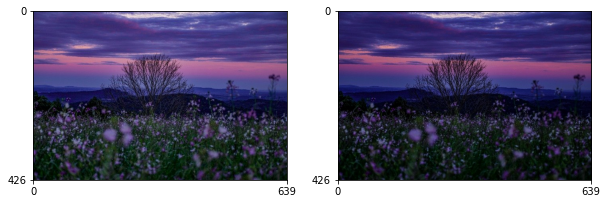

In [68]:
show_two_images(grass_stretched, grass_stretched_gamma)

In [69]:
def constrast_strectching_LUT(img):
    slope = 255/(img.max()-img.min())
    x = np.arange(256)
    lut = ((x - img.min())* slope).round(0).clip(0, 255).astype(np.uint8)
    return cv2.LUT(img, lut)

In [72]:
def show_equalized_histogram(img):
    if img.ndim == 3:
        img_L = RGB2gray(img)
    else:
        img_L = img
    hist, hist_centers = histogram(img_L)
    hist_centers_eq = np.array(list(range(256)), np.uint8)
    hist_eq = np.ones_like(hist_centers_eq) * (img.size // 256)
    fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True, sharey =True,figsize=(12,3))
    ax[0].plot(hist_centers, hist)
    ax[1].plot(hist_centers_eq, hist_eq)
    ax[0].set_xticks([0, 256//4, 256//2, 256//4*3, 255])
    ax[0].set_xlim(0, 255)
    plt.show()


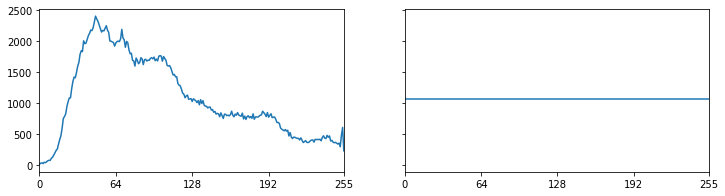

In [73]:
forest = plt.imread('forest.jpg')
forest_L = RGB2gray(forest)
show_equalized_histogram(forest_L)

In [75]:
grass_eq = np.empty_like(grass)
grass_eq[...,0] = cv2.equalizeHist(grass[...,0])
grass_eq[...,1] = cv2.equalizeHist(grass[...,1])
grass_eq[...,2] = cv2.equalizeHist(grass[...,2])

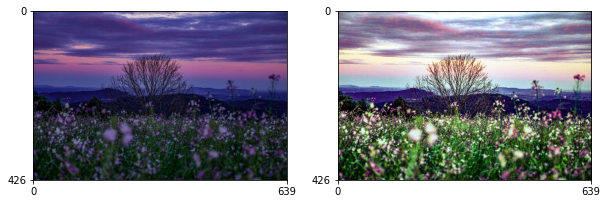

In [76]:
show_two_images(grass,grass_eq)